<a href="https://colab.research.google.com/github/asheta66/Data-Mining-2/blob/main/SVM.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn import svm, datasets
from sklearn.datasets import load_breast_cancer

# Load the breast cancer dataset
data = load_breast_cancer()
X = data.data[:, :2]  # Use only the first two features for visualization
y = data.target

# Create a mesh grid to plot the decision boundary
h = 0.02  # step size in the mesh
x_min, x_max = X[:, 0].min() - 0.5, X[:, 0].max() + 0.5
y_min, y_max = X[:, 1].min() - 0.5, X[:, 1].max() + 0.5
xx, yy = np.meshgrid(np.arange(x_min, x_max, h),
                     np.arange(y_min, y_max, h))

# Define the SVM models with different kernels
models = (
    svm.SVC(kernel='linear', C=1.0),
    svm.SVC(kernel='rbf', gamma=0.7, C=1.0),
    svm.SVC(kernel='poly', degree=3, C=1.0),
    svm.SVC(kernel='sigmoid', C=1.0)
)

# Create a new figure with a larger size
fig = plt.figure(figsize=(12, 8))

# Train each model and plot the decision boundary
for i, model in enumerate(models):
    model.fit(X, y)
    ax = fig.add_subplot(2, 2, i + 1)
    Z = model.predict(np.c_[xx.ravel(), yy.ravel()])
    Z = Z.reshape(xx.shape)
    ax.contourf(xx, yy, Z, cmap=plt.cm.Paired, alpha=0.8)
    ax.scatter(X[:, 0], X[:, 1], c=y, cmap=plt.cm.Paired, edgecolors='k')
    ax.set_title('SVM with kernel: {}'.format(model.kernel))
    ax.set_xlabel(data.feature_names[0])
    ax.set_ylabel(data.feature_names[1])

plt.tight_layout()
plt.show()


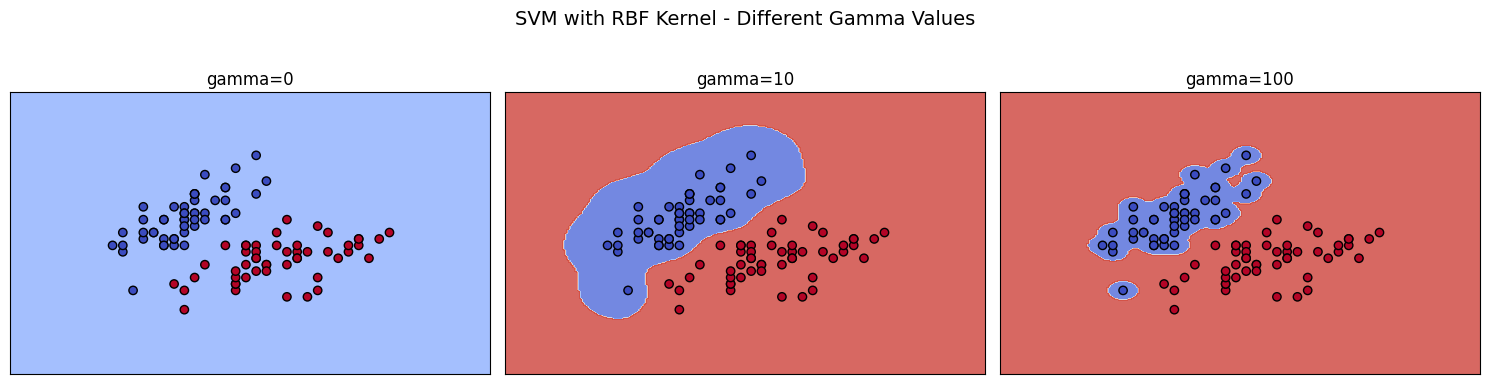

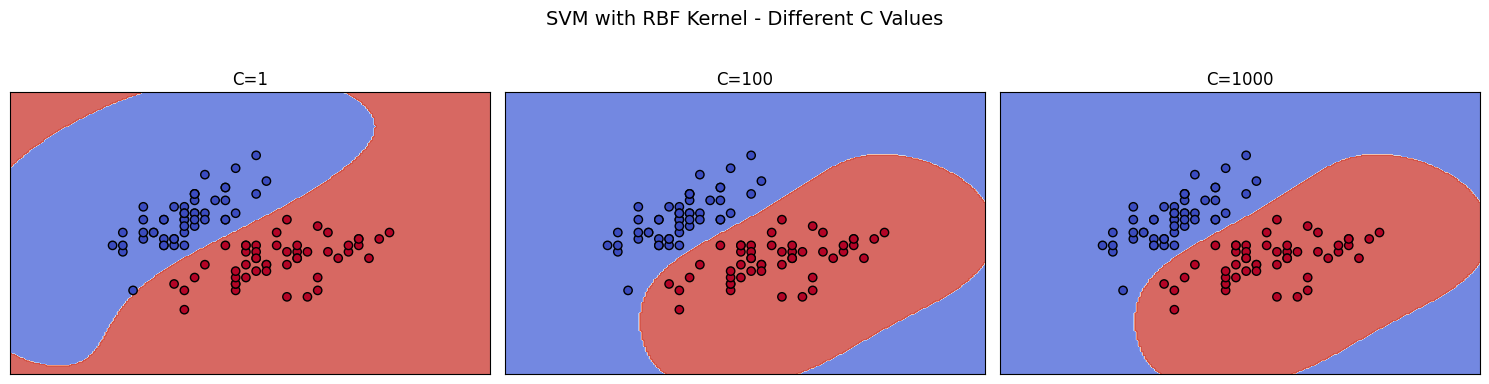

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn import datasets
from sklearn.svm import SVC
from sklearn.model_selection import train_test_split

# Load Iris dataset and simplify to two features and two classes for 2D plotting
iris = datasets.load_iris()
X = iris.data[:, :2] # Use Sepal length and width
y = iris.target
X = X[y != 2] # Keep only 2 classes
y = y[y != 2]

# Function to plot decision boundaries
def plot_decision_boundary(clf, X, y, ax, title):
    # Indentation added for the lines within the function
    h = .02
    x_min, x_max = X[:, 0].min() - 1, X[:, 0].max() + 1
    y_min, y_max = X[:, 1].min() - 1, X[:, 1].max() + 1
    xx, yy = np.meshgrid(np.arange(x_min, x_max, h),
                         np.arange(y_min, y_max, h))

    Z = clf.predict(np.c_[xx.ravel(), yy.ravel()])
    Z = Z.reshape(xx.shape)
    ax.contourf(xx, yy, Z, cmap=plt.cm.coolwarm, alpha=0.8)

    ax.scatter(X[:, 0], X[:, 1], c=y, cmap=plt.cm.coolwarm, edgecolors='k')
    ax.set_xlim(xx.min(), xx.max())
    ax.set_ylim(yy.min(), yy.max())
    ax.set_xticks(())
    ax.set_yticks(())
    ax.set_title(title)

# Plot for different gamma values
fig, axes = plt.subplots(1, 3, figsize=(15, 4))
for ax, gamma in zip(axes, [0, 10, 100]):
    clf = SVC(kernel='rbf', C=1, gamma=gamma)
    clf.fit(X, y)
    plot_decision_boundary(clf, X, y, ax, f"gamma={gamma}")
fig.suptitle("SVM with RBF Kernel - Different Gamma Values", fontsize=14)
plt.tight_layout(rect=[0, 0.03, 1, 0.95])
plt.show()

# Plot for different C values
fig, axes = plt.subplots(1, 3, figsize=(15, 4))
for ax, C in zip(axes, [1, 100, 1000]):
    clf = SVC(kernel='rbf', C=C, gamma=1)
    clf.fit(X, y)
    plot_decision_boundary(clf, X, y, ax, f"C={C}")
fig.suptitle("SVM with RBF Kernel - Different C Values", fontsize=14)
plt.tight_layout(rect=[0, 0.03, 1, 0.95])
plt.show()